In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [35]:
X = np.random.normal(size=10)

In [36]:
res = sp.stats.ecdf(X)

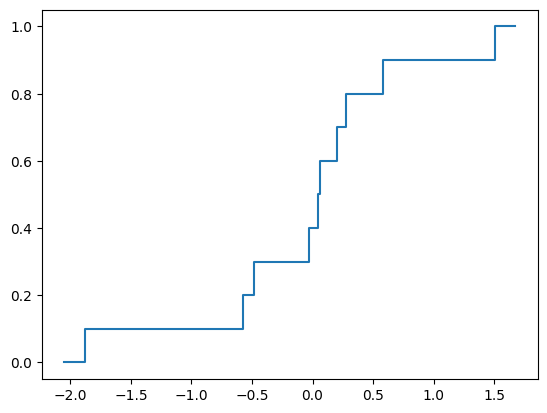

In [37]:
# plot cdf
ax = plt.subplot()
res.cdf.plot(ax)

In [38]:
x = np.linspace(-4, 4, 1000)

In [39]:
def _conf_set(F, alpha=.05):
    r"""
    Constructs a Dvoretzky-Kiefer-Wolfowitz confidence band for the eCDF.

    Parameters
    ----------
    F : array-like
        The empirical distributions
    alpha : float
        Set alpha for a (1 - alpha) % confidence band.

    Notes
    -----
    Based on the DKW inequality.

    .. math:: P \left( \sup_x \left| F(x) - \hat(F)_n(X) \right| > \epsilon \right) \leq 2e^{-2n\epsilon^2}

    References
    ----------
    Wasserman, L. 2006. `All of Nonparametric Statistics`. Springer.
    """
    nobs = len(F)
    epsilon = np.sqrt(np.log(2./alpha) / (2 * nobs))
    lower = np.clip(F - epsilon, 0, 1)
    upper = np.clip(F + epsilon, 0, 1)
    return lower, upper

In [40]:
F = res.cdf.evaluate(x)

In [43]:
lower, upper = _conf_set(F, 0.01)

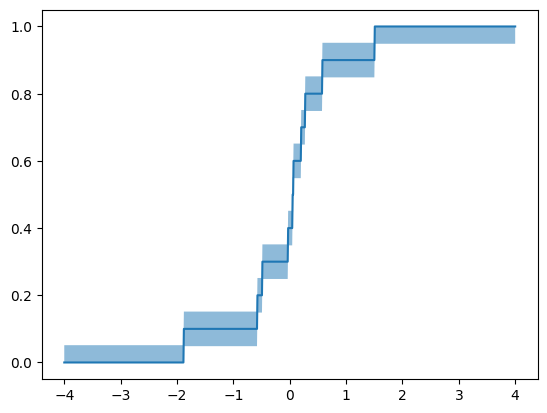

In [44]:
plt.plot(x, F)
plt.fill_between(x, lower, upper, alpha=0.5)